In [16]:
import netcomp as nc

# Speed Tests

We're going to test the timing (absolute, and complexity) for the algorithms we've got implemented so far.

We'll do this in the following manner. We'll set up a script for running multiple timing runs in parallel, then we'll take the average time (or maybe average of $n$ lowest?) in order to start examining the complexity. 

In [22]:
# Import things we'll use to analyze the timing
from sklearn.linear_model import LinearRegression
%load_ext line_profiler

def complexity_plot(log_range,times,label=None):
    "Make a logarithmic complexity plot, report best-fit line slope."
    logtime = np.log(times).reshape(-1,1)
    logn = np.log(log_range).reshape(-1,1)
    regr = LinearRegression()
    regr.fit(logn,logtime)

    slope = float(regr.coef_)
    fit_line = np.exp(regr.predict(logn))
    
    plt.figure();

    plt.loglog(log_range,times,'o');
    plt.loglog(log_range,fit_line,'--');
    plt.xlabel('Size of Problem');
    plt.ylabel('Time Elapsed');
    if label is not None:
        plt.title('Complexity of ' + label)
        print('Best fit line for {} has slope {:0.03f}.'.format(label,slope))
    else:
        print('Best fit line has slope {:.03f}.'.format(slope))

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [2]:
data_dict = pickle.load(open('graph_distance_timing.p','rb'))

In [4]:
print(data_dict['description'])

Time each of our metrics to discover
             computational complexity. 


In [5]:
df = data_dict['results_df']

In [6]:
df

,Edit,Resistance Dist.,DeltaCon,NetSimile,Lambda (Adjacency),Lambda (Laplacian),Lambda (Normalized Laplacian),Edit,Resistance Dist.,DeltaCon,...,Lambda (Adjacency),Lambda (Laplacian),Lambda (Normalized Laplacian),Edit,Resistance Dist.,DeltaCon,NetSimile,Lambda (Adjacency),Lambda (Laplacian),Lambda (Normalized Laplacian)
10,0.00028348,0.222237,0.00820446,0.155957,0.000599384,0.0318468,0.00213671,0.000197411,0.0945263,0.0390024,...,0.000494242,0.00204062,0.00241899,5.55515e-05,0.00218225,0.00351286,0.0290842,0.000563383,0.00170541,0.0019412
30,4.57764e-05,0.302673,0.00330758,0.972329,0.000780106,0.0020709,0.00264382,5.57899e-05,0.301902,0.00316405,...,0.000786543,0.0181258,0.00707316,5.4121e-05,0.0881832,0.00327969,1.43964,0.0011487,0.0091393,0.00272584
100,8.96454e-05,0.183244,0.165371,8.45824,0.186596,0.0797551,0.0687363,8.10623e-05,0.472628,0.204094,...,0.120481,0.24446,0.503008,0.000215054,0.0893686,0.130405,9.89184,0.197206,0.150302,0.154846
300,0.000606298,1.16293,0.159863,25.7166,2.63298,3.79907,3.31286,0.000564814,0.608195,0.133687,...,5.36296,6.76249,6.377,0.000378847,0.409895,0.090127,26.4921,0.725003,0.584409,0.812854
1000,0.0154662,9.41187,1.00786,155.145,32.3615,42.97,43.1355,0.00598025,5.61302,1.06776,...,12.0492,17.0299,15.4275,0.00331473,1.94809,0.34633,156.875,5.04571,4.75076,4.89122
3000,0.369191,299.135,3.47908,273.29,564.239,477.134,560.69,0.370803,187.179,19.5115,...,472.193,186.07,123.262,0.0430229,29.1903,2.08132,1974.56,282.375,145.252,59.3902


In [7]:
labels = df.columns.unique()

In [8]:
df_dict = {}

In [10]:
df['Edit'].T

,10,30,100,300,1000,3000
Edit,0.00028348,4.57764e-05,8.96454e-05,0.000606298,0.0154662,0.369191
Edit,0.000197411,5.57899e-05,8.10623e-05,0.000564814,0.00598025,0.370803
Edit,0.000216246,4.43459e-05,7.98702e-05,0.0258429,0.0320714,0.239238
Edit,0.000275612,4.52995e-05,6.91414e-05,0.000577211,0.00949001,0.244957
Edit,0.000202894,4.62532e-05,7.51019e-05,0.000561237,0.0184975,0.370901
Edit,0.00029397,4.52995e-05,7.9155e-05,0.00056529,0.00492525,0.302423
Edit,0.000118732,4.52995e-05,7.82013e-05,0.000560999,0.0178421,0.408601
Edit,0.000142336,4.72069e-05,9.91821e-05,0.000623703,0.00508285,0.322326
Edit,0.000145674,4.48227e-05,0.000103474,0.00056982,0.0406191,0.510803
Edit,0.00028491,4.62532e-05,8.7738e-05,0.000611305,0.00784707,0.253818


In [11]:
n = 100
for label in labels:
    df_temp = df[label].T
    df_temp.index = range(100)
    df_dict[label] = df_temp

In [14]:
df_total = pd.concat(df_dict,axis=1)

In [15]:
df_total

DeltaCon                                                       \
          10          30         100        300       1000     3000   
0   0.00820446  0.00330758   0.165371   0.159863   1.00786  3.47908   
1    0.0390024  0.00316405   0.204094   0.133687   1.06776  19.5115   
2    0.0255492  0.00326967   0.134615     0.2121   1.35013  20.7121   
3   0.00254083   0.0031991  0.0675135   0.289525    1.2284  18.9496   
4   0.00373173  0.00378919   0.123849   0.139059   0.71292  6.24403   
5     0.010268  0.00323176   0.145001   0.394451  0.889508  10.9971   
6   0.00732493   0.0032835   0.142652   0.122106   1.71077  7.25871   
7    0.0634875  0.00327587   0.134998   0.148662  0.628493  6.32107   
8   0.00247455  0.00315833   0.238209   0.128114   1.12096  13.2293   
9    0.0185492  0.00331211   0.220097   0.123091   1.45278   19.683   
10  0.00246906  0.00330091   0.105686   0.354446   1.63971  15.1695   
11   0.0235674  0.00328159  0.0674219   0.138284   1.06574  11.6472   
12   0.0299931  0.00333881   0.320308   0.140428  0.753508  6.85036   
13   0.0198274  0.00331926   0.132601   0.450442  0.869783  16.4244   
14   0.0398979  0.00331473   0.282356   0.167487   1.78895  11.1853   
15  0.00579095  0.00381613   0.133854   0.243878   0.53689  9.99625   
16  0.00652194  0.00316167   0.117872   0.178213   1.41665  12.0191   
17   0.0037322  0.00333786   0.105466   0.197984   1.59124   5.5716   
18  0.00249028  0.00324774   0.158101   0.287137   1.50268   2.5454   
19   0.0350316  0.00318265  0.0870342   0.229768  0.977381  10.9638   
20  0.00315642   0.0509071   0.252518   0.565023   1.85396  11.4247   
21   0.0703032  0.00404811   0.578033   0.353467   1.28807  10.9359   
22   0.0383575    0.041707   0.431826    0.37448   1.12623  8.54068   
23   0.0401249  0.00505853   0.271244   0.377284   1.34504  10.9792   
24   0.0363102  0.00368142   0.123279   0.290556   1.66722  11.3701   
25  0.00356483  0.00354505   0.272037   0.299258   1.08178  11.4604   
26   0.0383987    0.112523   0.164367   0.362127   1.11254  6.63539   
27   0.0267434   0.0327902    0.10284   0.238473  0.864369  7.71238   
28  0.00316405   0.0187602   0.169974   0.137836   1.00438  11.2765   
29   0.0454853   0.0173705   0.118016   0.218685   1.57731  5.00993   
..         ...         ...        ...        ...       ...      ...   
70   0.0221875  0.00478601   0.203532   0.195059  0.755858  7.37219   
71   0.0266867   0.0034945   0.122632   0.200907  0.729664  6.03421   
72   0.0216017   0.0241156  0.0987835   0.135259   1.18199   6.2178   
73   0.0126171  0.00331187   0.102618   0.461809   0.64116  3.95158   
74  0.00331283  0.00361419   0.136445  0.0892792   1.07894  4.61254   
75   0.0207899  0.00347638   0.377512    0.11098   0.87001  5.01065   
76   0.0200582  0.00362062  0.0971103   0.203827   1.42324  3.61205   
77   0.0229545  0.00340271   0.120472   0.542338   1.68286  3.79592   
78  0.00324655   0.0245507   0.223871   0.184385  0.995938  3.82391   
79   0.0399075   0.0200801   0.103044   0.212389   1.15255  2.37331   
80    0.035527  0.00375414   0.532439   0.404772   1.51675  8.31719   
81   0.0354512   0.0463622   0.212068   0.271919   1.53248  10.7588   
82   0.0584714   0.0430498   0.171326   0.289474  0.847046  9.27352   
83   0.0792615  0.00361729   0.206428   0.275465   1.38957  10.6554   
84  0.00346994  0.00500035   0.179486   0.737461   1.34554  8.63438   
85   0.0411093  0.00357485   0.206932   0.223555   1.36813  8.43188   
86   0.0232716   0.0298278   0.140514   0.464055   1.62925  8.13316   
87  0.00319791   0.0296748   0.128548   0.654692   1.30826   6.3271   
88   0.0320525   0.0337968   0.170508   0.236835   1.12896  6.49818   
89   0.0188746  0.00455403    0.17303   0.250048   0.83953  6.67258   
90   0.0298221   0.0544572   0.267794   0.236287   1.06179  6.83444   
91   0.0192378    0.021419   0.131151    0.22551  0.733673  9.10781   
92  0.00487614   0.0207679   0.211021   0.222272    1.8271  4.85606   
93  0.00327659  0.00739121   0

Best fit line for Edit has slope 2.340.
Best fit line for Resistance Dist. has slope 2.024.
Best fit line for DeltaCon has slope 1.159.
Best fit line for NetSimile has slope 1.065.
Best fit line for Lambda (Adjacency) has slope 2.183.
Best fit line for Lambda (Laplacian) has slope 2.227.
Best fit line for Lambda (Normalized Laplacian) has slope 2.177.


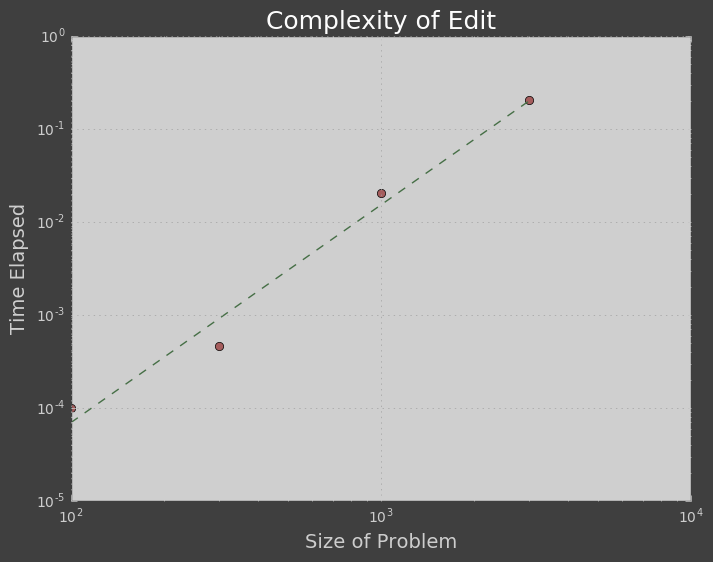

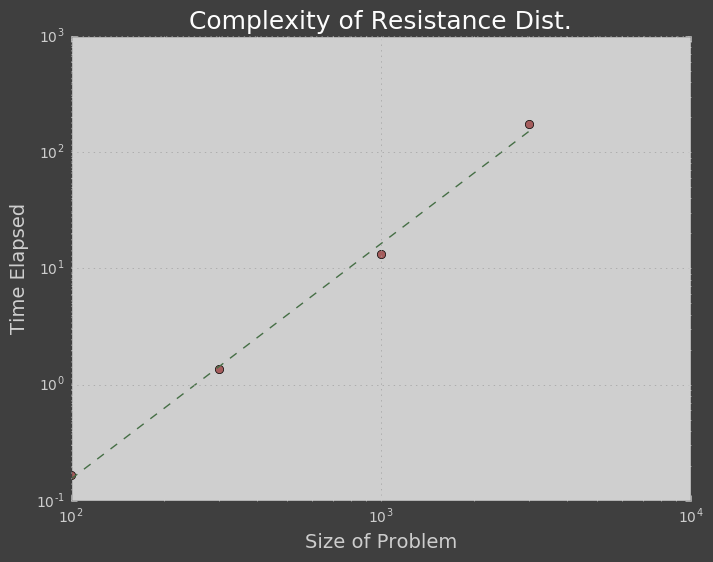

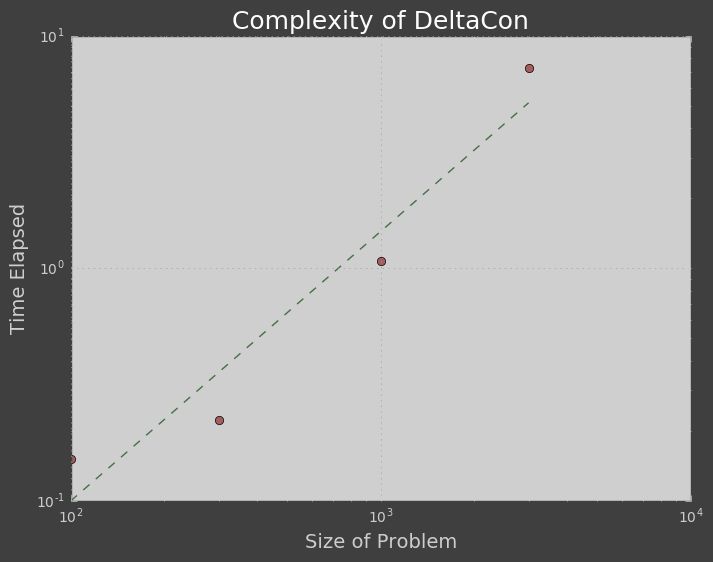

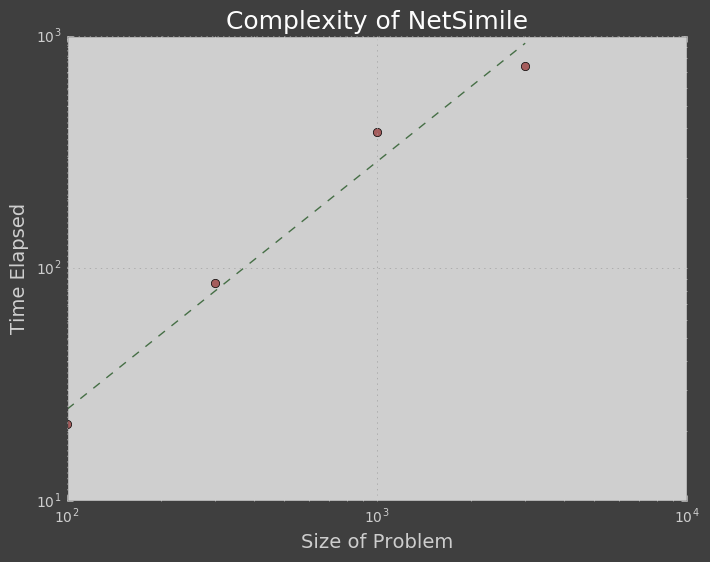

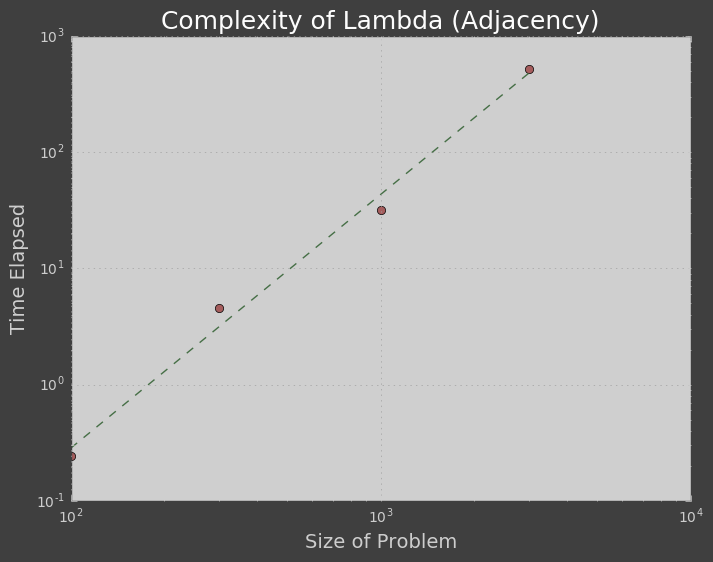

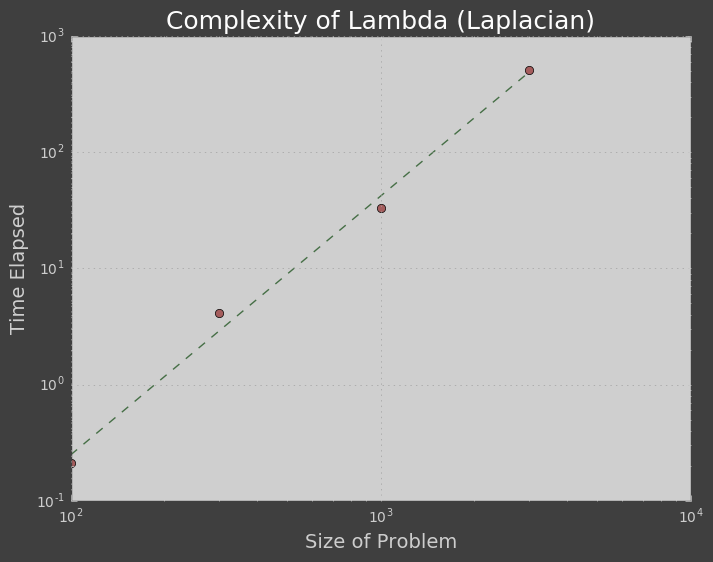

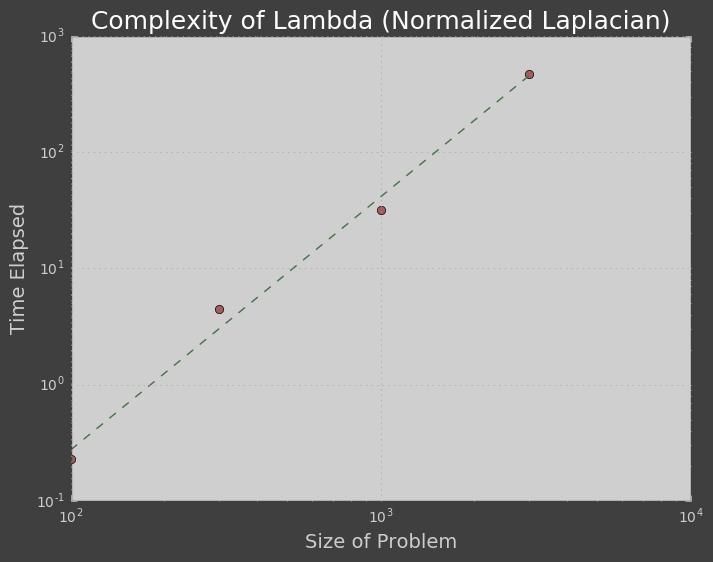

In [27]:
ran = [10,30,100,300,1000,3000]
for label in labels:
    complexity_plot(ran[2:],np.array(df_total[label].median())[2:],label=label)
    plt.title('Complexity of ' + label)

Hrmm... I don't really trust these results, because a lot of them don't look that linear. We'd better take a look at the statistics, and the code, to make sure taht we're not accidentally taking any unexpected algorithmic shortcuts here.